In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import pylab as pl
%matplotlib inline

In [2]:
admissions_data = pd.read_csv('~/DS-SF-31/Projects/Project_2/admissions.csv')

In [3]:
admissions_data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [4]:
print "\nSize of the dataset:"
print len(admissions_data) # size of dataset 

def number_missing(X): # function summing up all the null values in the dataset over each column
    return sum(X.isnull())
print "\nMissing values per column:"
print admissions_data.apply(number_missing, axis=0).head()


Size of the dataset:
400

Missing values per column:
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [5]:
admissions_data.describe().transpose() ## the 50th percentile can be the median, but included it below, too.

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


In [7]:
print "\n Medians:"
print admissions_data.median()
print "\n Standard Deviation:"
print admissions_data.std()
print "\n Mean:"
print admissions_data.mean()
print "\n Size:"
print admissions_data.count()



 Medians:
admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

 Standard Deviation:
admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

 Mean:
admit         0.317500
gre         588.040201
gpa           3.390930
prestige      2.486216
dtype: float64

 Size:
admit       400
gre         398
gpa         398
prestige    399
dtype: int64


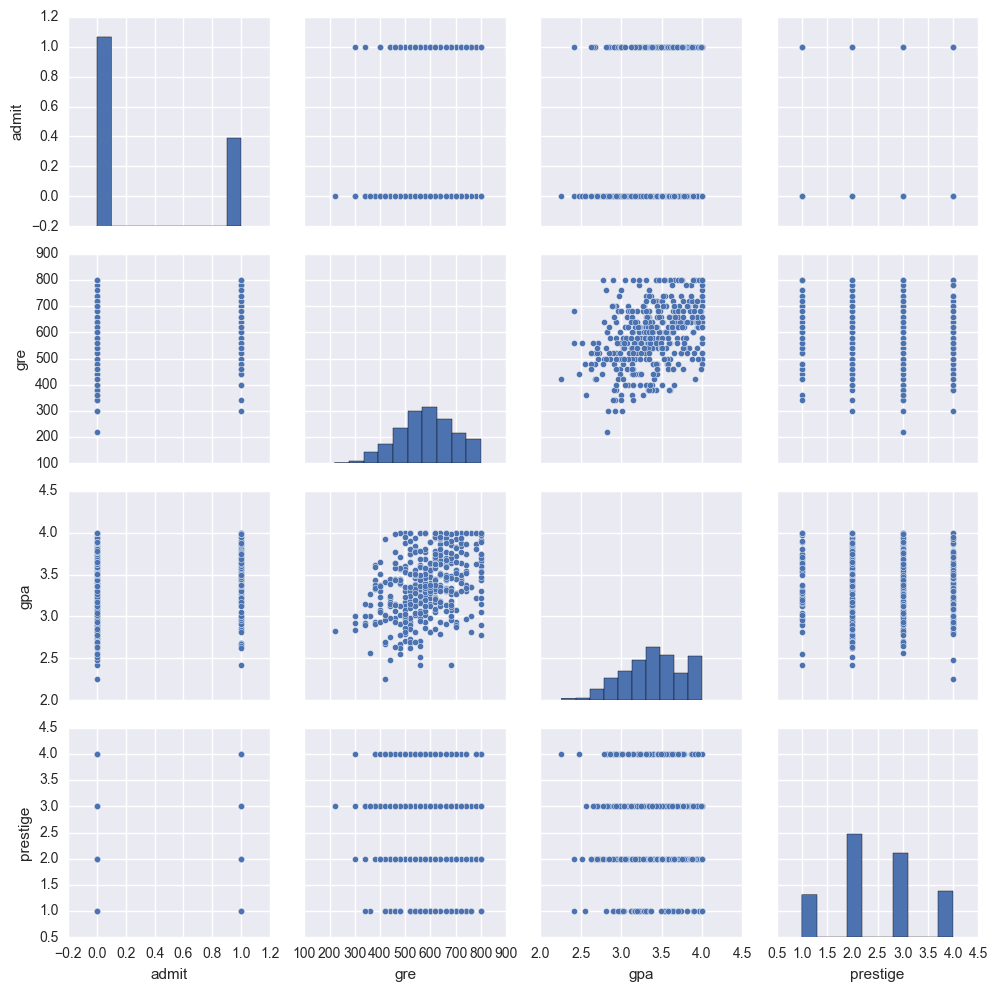

In [14]:
# scatter matrix to look at the distributions and covariance 
sb.pairplot(admissions_data.dropna())

In [ ]:
  - Describe the distributions of your data
  - Plot box plots for each variable
  - Create a covariance matrix


Based on the above correlation matrix and histogram plots:
    Admit- More people are not admitted, this could lead to an overfitting issue. Since this is a classification 
    problem (the outcome is binary), we can expect any model to have a lot more false positives for prediciting 
    people who were admitted. Admission appears to be positively correlated with GRE scores and GPA, where people
    who were not admitted tended to have lower GPAs and GRE scores. Not really correlated to prestige.
    GRE- GRE follows a relatively normal distribution around the mean, with a slight right skew
    (the mean is slightly higher than the median). Gre is slightly positively correlated with GPA, 
    no other notable correlations. 
    GPA- Similar to GRE,GPA follows a relatively normal distribution, with a slightly stronger right bias. 
    GPA does not appear to be strongly correlated with any other variables, other than GRE (mentioned above)
    Prestige- Prestige is relatively normally distributed, with a slight left bias, (mean is greater than the median),
    which would indicate there are more applications to lesser quality schools. 
    
I think that including both GPA and GRE scores in the model might be overfitting, because they are very similar metrics,
and when looking at the relationship of GRE and GPA to admissions, they have very similiar scatterplots, 
this would indicate that including both would be overstating how much variance can be explained by the 
explanatory variables, creating a bias. 

/Users/jcreighton/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


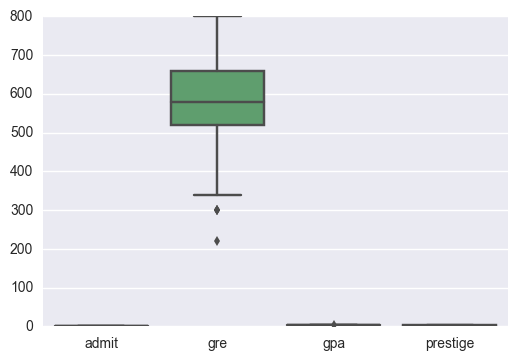

In [18]:
sb.boxplot(admissions_data) # not normalized 

In [27]:
log_columns = ['gre', 'gpa','prestige']  
log_admin = admissions_data.copy()
log_admin[log_columns] = log_admin[log_columns].apply(np.log10)
X = log_admin.drop(['admit'], axis=1,inplace=True) 


/Users/jcreighton/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


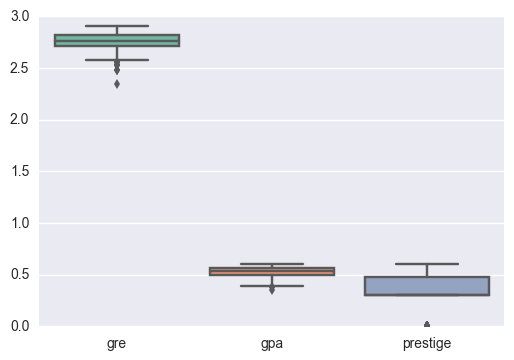

In [28]:
sb.boxplot(log_admin, palette="Set2")  # better kind of 

In [ ]:
=